# 数据预处理

C:\Users\LYF\AppData\Local\Temp\ipykernel_18832\2651912675.py:45: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,column]=enc.fit_transform(df.loc[:,column])
C:\Users\LYF\AppData\Local\Temp\ipykernel_18832\2651912675.py:54: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,column] = (df.loc[:,column]-df.loc[:,column].min())/(df.loc[:,column].max()-df.loc[:,column].min())


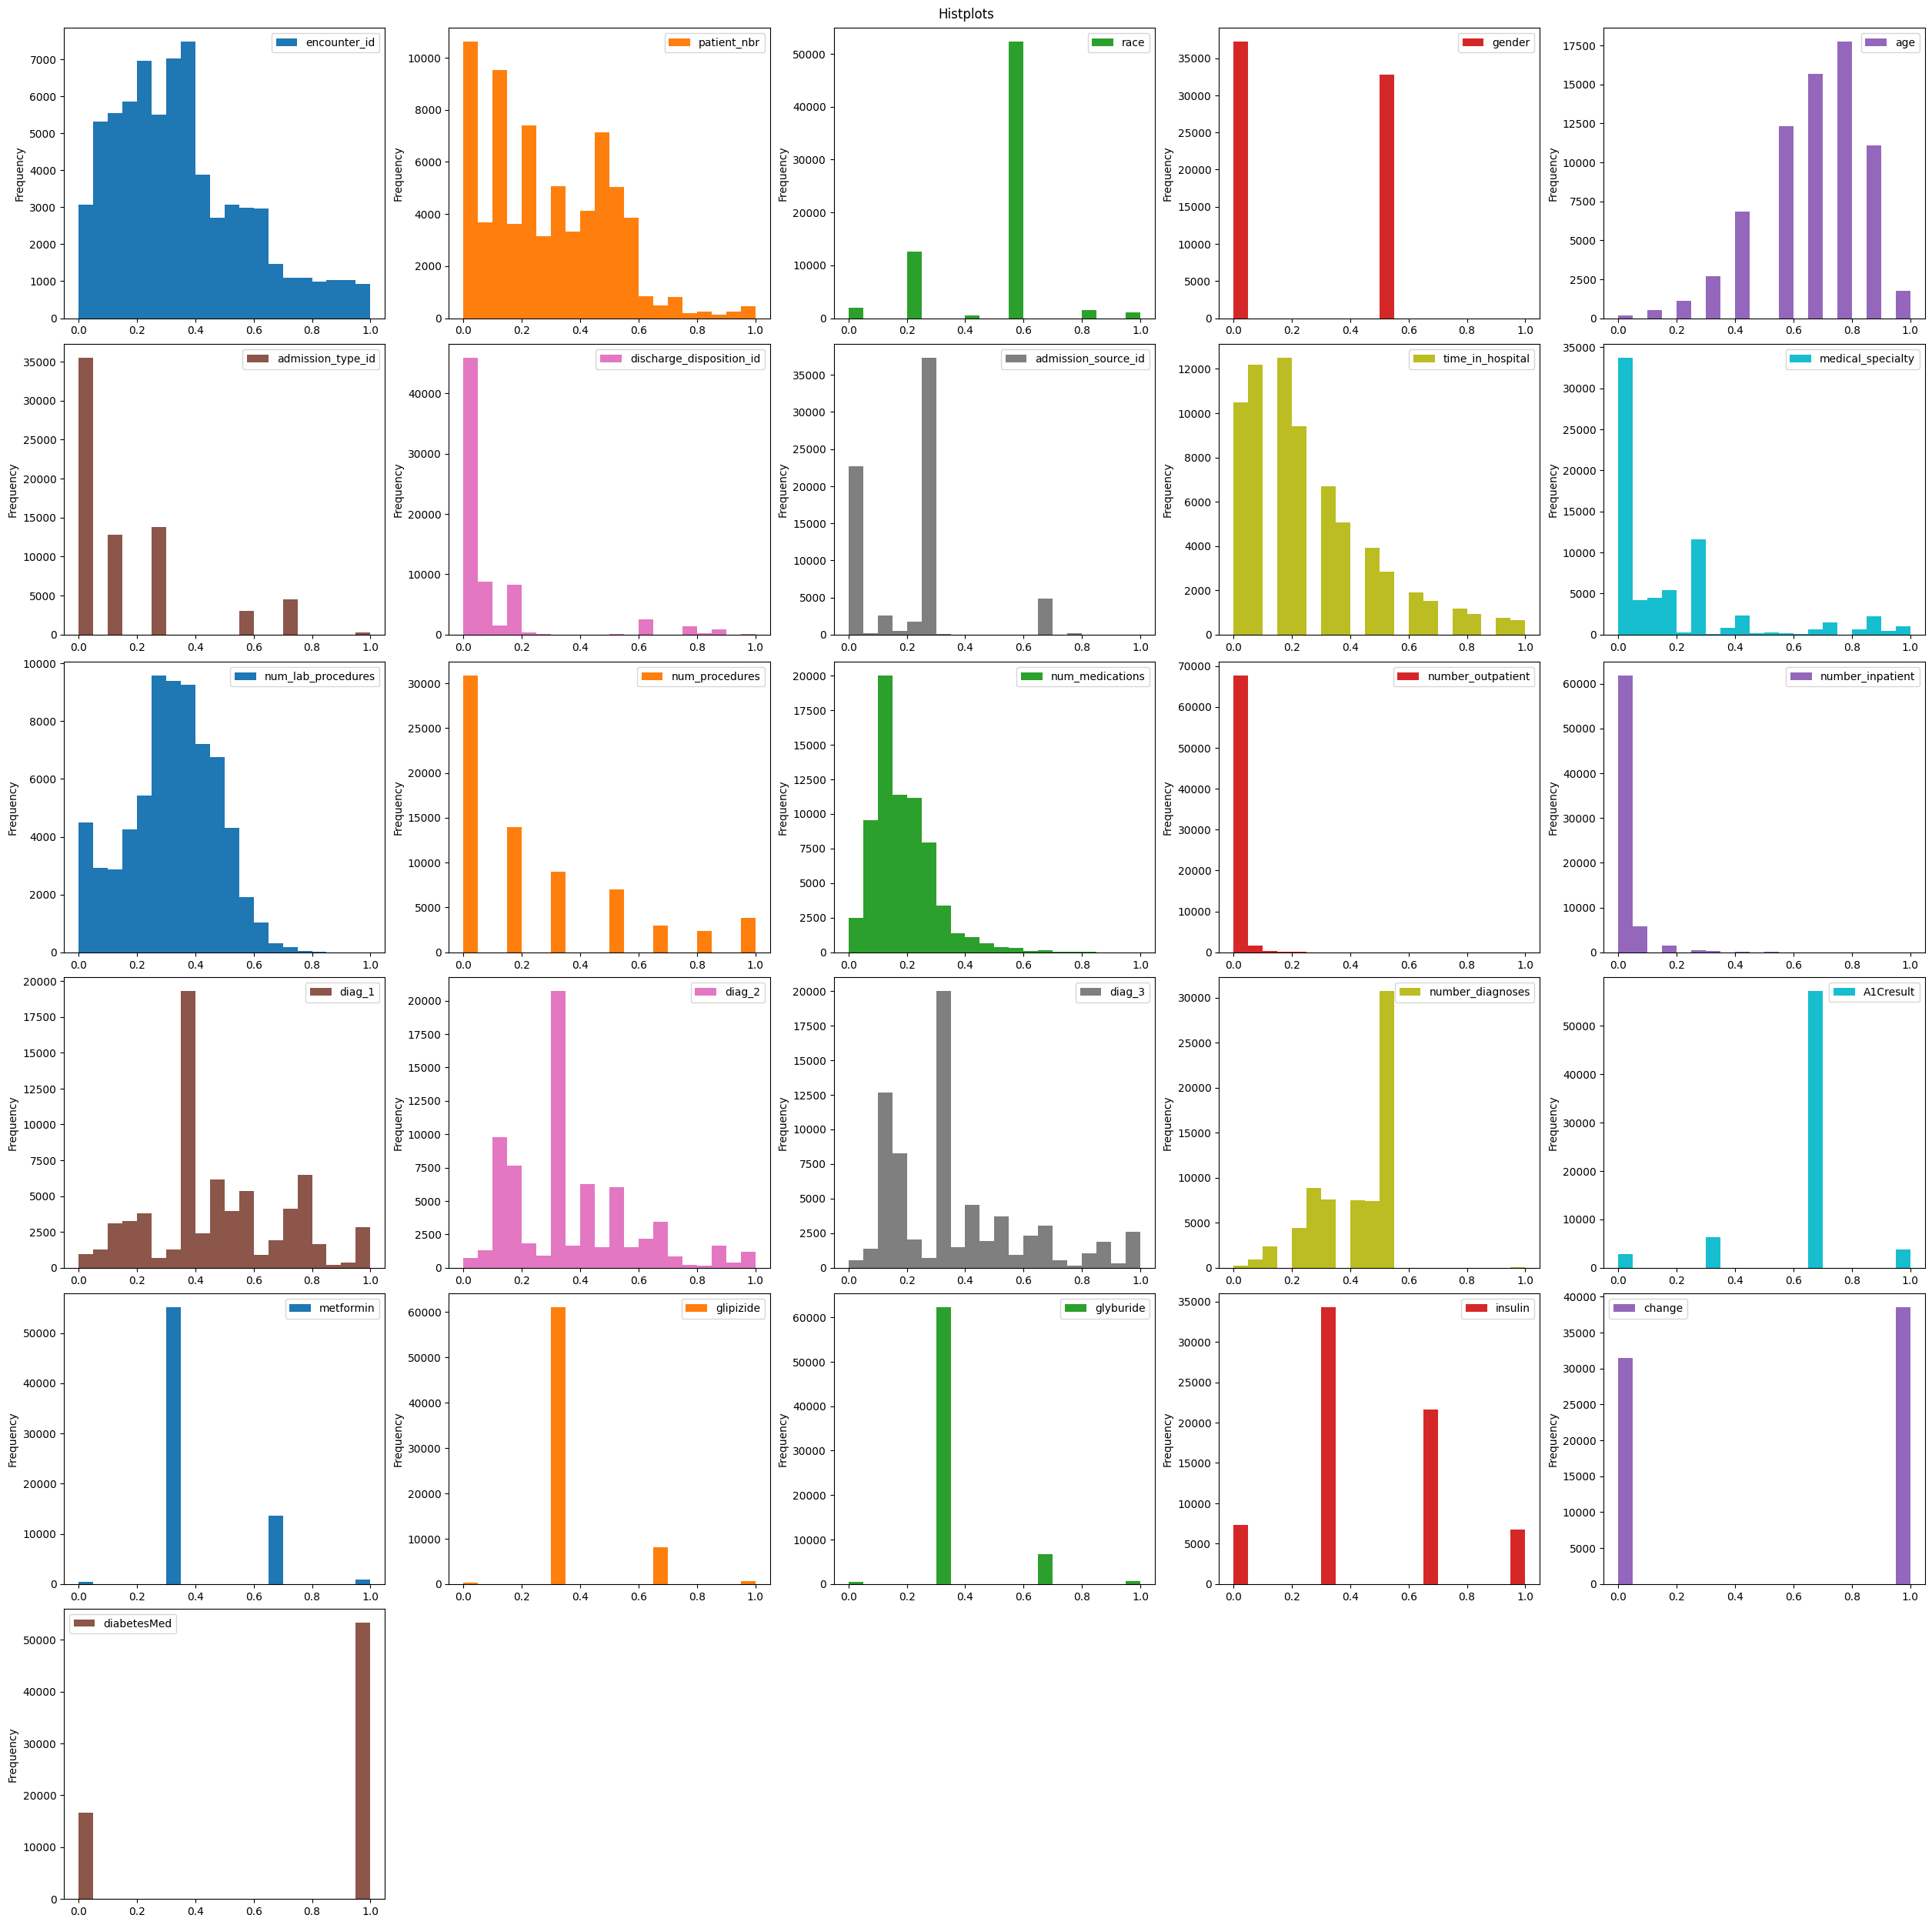

In [43]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from collections import Counter
# import matplotlib

df = pd.read_csv('.\dataset_diabetes\diabetic_data.csv')
# hist识别哪些列为数值属性
# df.hist()

# 分离数值属性与名义属性
num_columns = ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications','number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
allcolumns = df.columns.values.tolist()
nor_columns = list(set(allcolumns)-set(num_columns))

# 仅保留病人第一次入院数据
df = df.sort_values(by=['encounter_id'],ascending=True)
df = df.drop_duplicates(subset=['patient_nbr'])

# 删去死亡与转到临终关怀医院的数据
expired = {11,13,14,19,20,21}  # 死亡或转至临终关怀医院对应的discharge_disposition_id
dropID = []
for value in df.index.values:
    if df.loc[value,'discharge_disposition_id'] in expired:
        dropID.append(value)
df = df.drop(dropID)      # 去除死亡或转至临终关怀医院的病人

# 去除某属性占比较高的特征
dropColumn = ['weight','payer_code','readmitted']
for column in df.columns.values:
    count = Counter(df.loc[:,column])
    ratio = count.most_common()[0][1] / sum(count.values())
    if ratio >= 0.9 and not column in dropColumn:    # 单个属性占比90%时删除
        dropColumn.append(column)
df = df.drop(dropColumn,axis=1)
# 更新删除特征后的名义属性与数值属性
num_columns = list(set(num_columns)-set(dropColumn))
allcolumns = df.columns.values.tolist()
nor_columns = list(set(allcolumns)-set(num_columns))

# labelencoder将名义属性转为数值
enc = preprocessing.LabelEncoder()
for column in nor_columns:
    df.loc[:,column]=enc.fit_transform(df.loc[:,column])

# 数据归一化
# scaler = preprocessing.MinMaxScaler()
# df = scaler.fit_transform(df)   # 数据类型变为ndarray，不会画图了。。
for column in allcolumns:   # 保持数据类型为dataframe方便后面用.plot画图。。
    if df.loc[:,column].min()==df.loc[:,column].max():  #避免单值属性计算出bug
        df.loc[:,column] = 0
    else:
        df.loc[:,column] = (df.loc[:,column]-df.loc[:,column].min())/(df.loc[:,column].max()-df.loc[:,column].min())

# 直方图看数据分布情况
fig,axes = plt.subplots(10,5,constrained_layout = True,figsize=(5*5,10*4))
df.plot(kind='hist',ax=np.reshape(axes,50)[0:len(allcolumns)],bins=20, subplots=True, title='Histplots')
for i in range(len(allcolumns),50):    # 去除空子图
    fig.delaxes(axes.flatten()[i])